In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_hdf('../data/Figure5Revision.h5')

In [3]:
frame_np_bayes_baseline_330 = data['frame_id']['bayes']['np_baseline_330']
frame_np_bayes_baseline_33 = data['frame_id']['bayes']['np_baseline_33']
frame_np_knn_baseline_330 =data['frame_id']['knn']['np_baseline_330']
frame_np_knn_baseline_33 = data['frame_id']['knn']['np_baseline_33']
frame_np_cebra_knn_330 = data['frame_id']['knn']['np_cebra_330']
frame_np_cebra_knn_33 = data['frame_id']['knn']['np_cebra_33']
frame_np_joint_cebra_knn_330 = data['frame_id']['knn']['np_cebra_joint_330']
frame_np_joint_cebra_knn_33 = data['frame_id']['knn']['np_cebra_joint_33']


scene_np_bayes_baseline_330 = data['scene_annotation']['bayes']['np_baseline_330']
scene_np_bayes_baseline_33 = data['scene_annotation']['bayes']['np_baseline_33']
scene_np_knn_baseline_330 =data['scene_annotation']['knn']['np_baseline_330']
scene_np_knn_baseline_33 = data['scene_annotation']['knn']['np_baseline_33']
scene_np_cebra_knn_330 = data['scene_annotation']['knn']['np_cebra_330']
scene_np_cebra_knn_33 = data['scene_annotation']['knn']['np_cebra_33']
scene_np_joint_cebra_knn_330 = data['scene_annotation']['knn']['np_cebra_joint_330']
scene_np_joint_cebra_knn_33 = data['scene_annotation']['knn']['np_cebra_joint_33']

In [4]:
num_neurons = [50,100,200,400, 600, 800,900, 1000]

def set_ax(ax, white_c):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_color(white_c)
    ax.spines['bottom'].set_color(white_c)
    ax.set_xticks(np.arange(8)[1::2], [50, 100, 200, 400, 600, 800, 900, 1000][1::2], fontsize = 30, color = white_c)
    ax.set_yticks(np.linspace(0,100,5), np.linspace(0,100,5, dtype = int), fontsize = 30,color = white_c)
    ax.set_xlabel('# Neurons', fontsize = 35, color = white_c)
    
    ax.tick_params(colors=white_c)
    l1=ax.legend(fontsize= 15, loc = 'lower right', title_fontsize = 15,  frameon = False  )
    
    for text in l1.get_texts():
        text.set_color(white_c)
        
def n_mean_err(dic, ns = num_neurons):
    means=[]
    errs=[]
    for n in ns:
        means.append(np.mean(dic[n]))
        errs.append(np.std(dic[n])/np.sqrt(len(dic[n])))
    return np.array(means), np.array(errs)

def n_mean_err_joint(dic, modality, ns = num_neurons):
    means=[]
    errs=[]
    if modality == 'np':
        ind = 1
    elif modality == 'ca':
        ind = 0
    for n in ns:
        _d = np.array(dic[n])[:,ind]
        means.append(np.mean(_d))
        errs.append(np.std(_d)/np.sqrt(len(_d)))
    return np.array(means), np.array(errs)

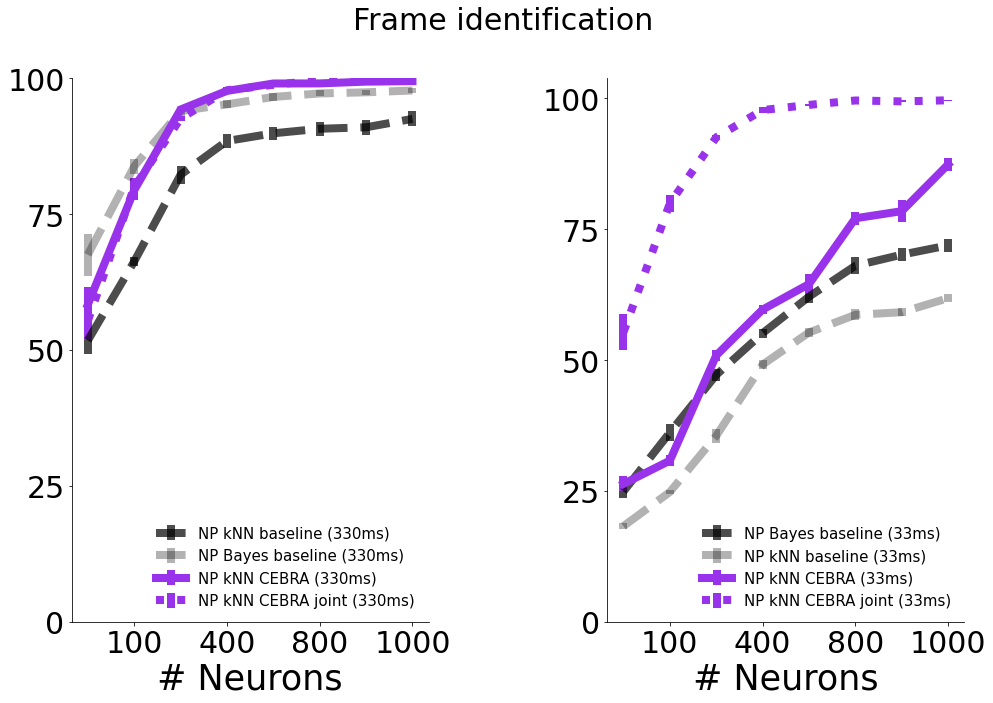

In [5]:
white = False

if white:
    white_c='white'
else:
    white_c = 'black'

fig = plt.figure(figsize=(16,10))
fig.suptitle('Frame identification', fontsize=30)
plt.subplots_adjust(wspace = 0.5)
ax1 = plt.subplot(121)

c="#9932EB"

ax1.errorbar(np.arange(8), n_mean_err(frame_np_knn_baseline_330)[0], n_mean_err(frame_np_knn_baseline_330)[1],
             ls = '--',label = 'NP kNN baseline (330ms)', color = 'k', alpha =0.7, 
             markersize= 20, linewidth = 8)

ax1.errorbar(np.arange(8), n_mean_err(frame_np_bayes_baseline_330)[0], n_mean_err(frame_np_bayes_baseline_330)[1],
             ls='--',  label = 'NP Bayes baseline (330ms)', color = 'k', alpha =0.3, 
             markersize= 20, linewidth = 8)

ax1.errorbar(np.arange(8), n_mean_err(frame_np_cebra_knn_330)[0], n_mean_err(frame_np_cebra_knn_330)[1], 
             label = 'NP kNN CEBRA (330ms)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)
             
ax1.errorbar(np.arange(8), n_mean_err_joint(frame_np_joint_cebra_knn_330, 'np')[0], 
             n_mean_err_joint(frame_np_joint_cebra_knn_330, 'np')[1], 
            ls = 'dotted',label = 'NP kNN CEBRA joint (330ms)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)

ax1.set_ylim(25,100)
set_ax(ax1, white_c)

    
ax2 = plt.subplot(122)

ax2.errorbar(np.arange(8), n_mean_err(frame_np_bayes_baseline_33)[0], n_mean_err(frame_np_bayes_baseline_33)[1], 
             ls = '--',label = 'NP Bayes baseline (33ms)', color = 'k', alpha =0.7, 
             markersize= 20, linewidth = 8)

ax2.errorbar(np.arange(8), n_mean_err(frame_np_knn_baseline_33)[0], n_mean_err(frame_np_knn_baseline_33)[1], 
             ls = '--', label = 'NP kNN baseline (33ms)', color = 'k', alpha =0.3, 
             markersize= 20, linewidth = 8)

ax2.errorbar(np.arange(8), n_mean_err(frame_np_cebra_knn_33)[0], n_mean_err(frame_np_cebra_knn_33)[1], 
             label = 'NP kNN CEBRA (33ms)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)
         
ax2.errorbar(np.arange(8), n_mean_err_joint(frame_np_joint_cebra_knn_33, 'np')[0], 
             n_mean_err_joint(frame_np_joint_cebra_knn_33, 'np')[1], 
            ls = 'dotted',label = 'NP kNN CEBRA joint (33ms)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)

set_ax(ax2, white_c)


plt.show()

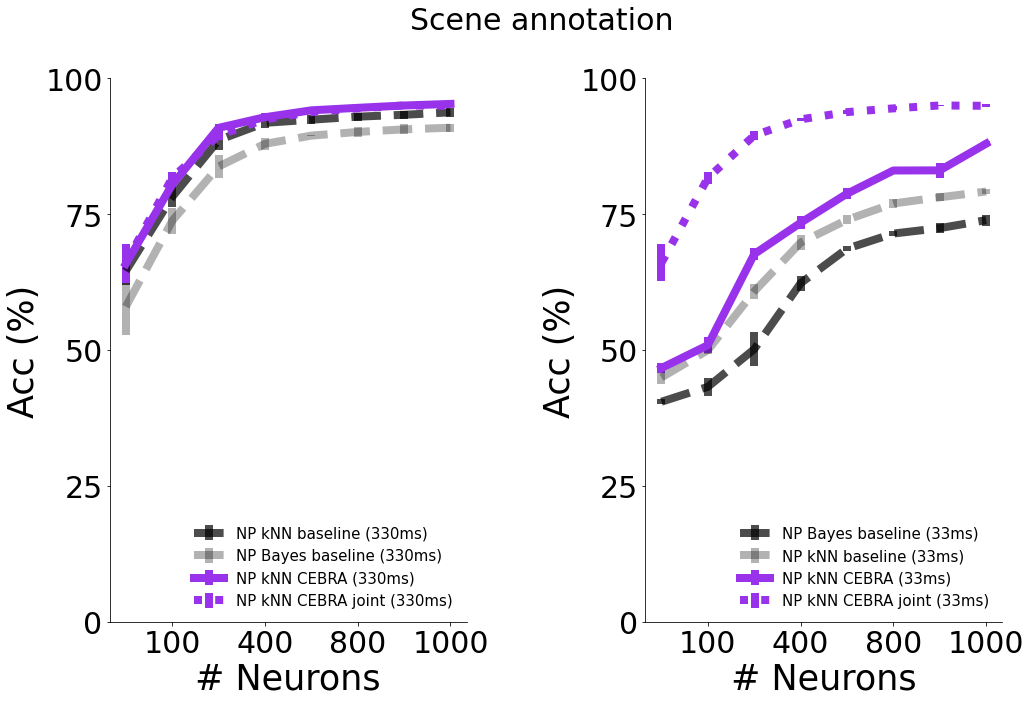

In [6]:
white = False

if white:
    white_c='white'
else:
    white_c = 'black'

fig = plt.figure(figsize=(16,10))
fig.suptitle('Scene annotation', fontsize=30)
plt.subplots_adjust(wspace = 0.5)
ax1 = plt.subplot(121)

c="#9932EB"

ax1.errorbar(np.arange(8), n_mean_err(scene_np_knn_baseline_330)[0]*100, n_mean_err(scene_np_knn_baseline_330)[1]*100,
             ls = '--',label = 'NP kNN baseline (330ms)', color = 'k', alpha =0.7, 
             markersize= 20, linewidth = 8)

ax1.errorbar(np.arange(8), n_mean_err(scene_np_bayes_baseline_330)[0]*100, n_mean_err(scene_np_bayes_baseline_330)[1]*100,
             ls='--',  label = 'NP Bayes baseline (330ms)', color = 'k', alpha =0.3, 
             markersize= 20, linewidth = 8)

ax1.errorbar(np.arange(8), n_mean_err(scene_np_cebra_knn_330)[0]*100, n_mean_err(scene_np_cebra_knn_330)[1]*100, 
             label = 'NP kNN CEBRA (330ms)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)

ax1.errorbar(np.arange(8), n_mean_err_joint(scene_np_joint_cebra_knn_330, 'np')[0]*100, 
             n_mean_err_joint(scene_np_joint_cebra_knn_330, 'np')[1]*100, 
            ls = 'dotted',label = 'NP kNN CEBRA joint (330ms)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)

ax1.set_ylim(25,100)
set_ax(ax1, white_c)
ax1.set_ylabel(f'Acc (%)', fontsize= 35,  color = white_c)
    
ax2 = plt.subplot(122)


ax2.errorbar(np.arange(8), n_mean_err(scene_np_bayes_baseline_33)[0]*100, n_mean_err(scene_np_bayes_baseline_33)[1]*100, 
             ls = '--',label = 'NP Bayes baseline (33ms)', color = 'k', alpha =0.7, 
             markersize= 20, linewidth = 8)

ax2.errorbar(np.arange(8), n_mean_err(scene_np_knn_baseline_33)[0]*100, n_mean_err(scene_np_knn_baseline_33)[1]*100, 
             ls = '--', label = 'NP kNN baseline (33ms)', color = 'k', alpha =0.3, 
             markersize= 20, linewidth = 8)

ax2.errorbar(np.arange(8), n_mean_err(scene_np_cebra_knn_33)[0]*100, n_mean_err(scene_np_cebra_knn_33)[1]*100, 
             label = 'NP kNN CEBRA (33ms)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)

ax2.errorbar(np.arange(8), n_mean_err_joint(scene_np_joint_cebra_knn_33, 'np')[0]*100, 
             n_mean_err_joint(scene_np_joint_cebra_knn_33, 'np')[1]*100, 
            ls = 'dotted',label = 'NP kNN CEBRA joint (33ms)', color = c, alpha =1, 
             markersize= 20, linewidth = 8)

set_ax(ax2, white_c)
ax2.set_ylabel(f'Acc (%)', fontsize= 35,  color = white_c)

plt.show()

(75.0, 100.0)

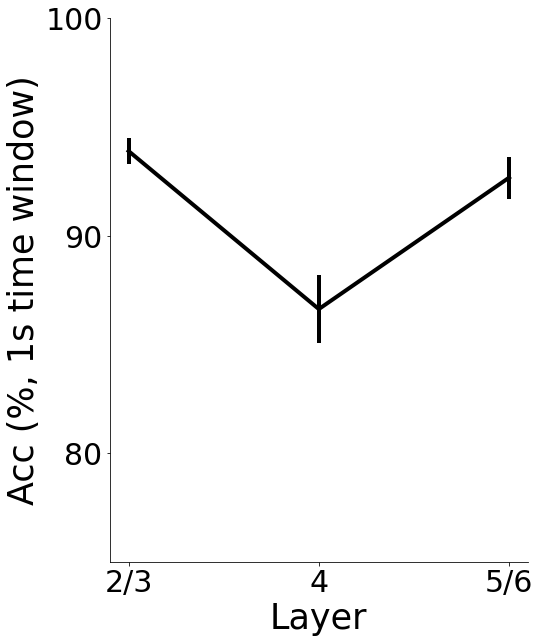

In [7]:
layer_decoding = data['layer_decoding'][900]
fig=plt.figure(figsize=(7.5,10))
ax=fig.add_subplot(111)

labels =['900']
colors =['black', 'gray', 'lightgray']

ax.errorbar(np.arange(3), [np.mean(layer_decoding[layer])for layer in [2,4,5]], 
            [np.std(layer_decoding[layer]) / np.sqrt(len(layer_decoding[layer]))for layer in [2,4,5]],
           c='k', lw = 4)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['2/3', '4', '5/6'], fontsize=30)
ax.set_yticks(np.linspace(70, 100, 4))
ax.set_yticklabels(np.linspace(70, 100, 4, dtype= int), fontsize=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks(fontsize=30)
plt.ylabel('Acc (%, 1s time window)', fontsize= 35)
plt.xlabel('Layer', fontsize= 35)
plt.ylim(75, 100)
#plt.legend(frameon=False, fontsize='xx-large')

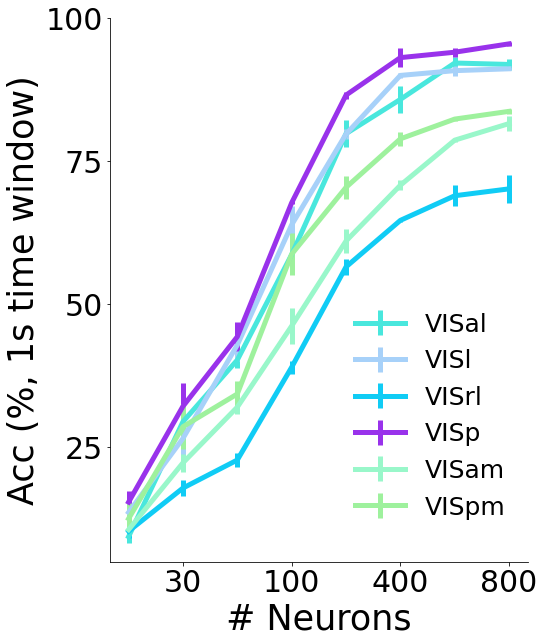

In [8]:
colors = {
    'VISl':'#A7D1F9',
    'VISrl': '#10CCF5',
    'VISal': '#49E7DD',
    'VISp': "#9932EB",
    'VISam':"#99F7CA",
    'VISpm':"#9EF19D"
    
}

np_decoding = data['cortex_decoding']

plt.figure(figsize=(7.5,10))
#plt.title('Decoding by cortical area - DINO feature', fontsize=35, y=1.1)
ax = plt.subplot(111)
for area in ['VISal', 'VISl', 'VISrl', 'VISp', 'VISam', 'VISpm']:
    ax.errorbar(np.arange(8), [np.mean(np_decoding[area][k])
                                for k in [10,30, 50, 100, 200, 400, 600, 800]], 
                [np.std(np_decoding[area][k])/np.sqrt(len(np_decoding[area][k]))
                                for k in [10,30, 50, 100, 200, 400, 600, 800]],
                label = area, 
                lw = 5, color = colors[area])
    
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.xticks(np.arange(1,8,2), [10,30, 50, 100, 200, 400, 600, 800][1::2], fontsize = 30, color = 'k')

plt.yticks( np.linspace(0, 100, 5),np.linspace(0, 100, 5,dtype = int), color = 'k', fontsize=30)

plt.xlabel('# Neurons', fontsize=35)
plt.ylabel('Acc (%, 1s time window)', fontsize=35)
plt.ylim(5,100)
l=plt.legend(frameon = False, bbox_to_anchor=[1,0.5], fontsize=25 )